# 4.10 Coding Etiquette & Excel reporting

## This script contains the following point:

1. Import the merged data set

2. Consider any security implications that might exist for this data

3. Compare customer behavior in different geographic areas

4. Create an exclusion flag for low-activity customers and exclude them from the data

5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

6. Create an appropriate visualization to show the distribution of profiles

7. Aggregate the max, mean, and min on a customer-profile level for usage frequency and expenditure

8. Compare customer profiles with regions and departments

9. Produce suitable charts to illustrate the results and export them

10. Export the final data set

## 1. Import the merged data setthe final data set

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import os

In [5]:
# Import data

path = r'C:\Users\admin\06-2024 Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_new_cols_grouped_dropped_merged.pkl'))

## 2. Consider any security implications that might exist for this data

In [7]:
ords_prods_merge.head()

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,...,busiest_day,busiest_days,busiest_period_of_day_loc,max_order,loyalty_flag,average_prices,spending_flag,median_days_since_prior_order,order_frequency_flag,_merge3
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy,Regular busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy,Regular busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy,Least busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [8]:
ords_prods_merge.dtypes

user_id                             int64
first_name                         object
surname                            object
gender                             object
state                              object
age                                 int64
date_joined                        object
n_dependants                        int64
fam_status                         object
income                              int64
product_id                          int64
product_name                       object
aisle_id                            int64
department_id                       int64
prices                            float64
order_id                            int64
eval_set                           object
number_of_order                     int64
orders_day_of_week                  int64
order_hour_of_day                   int64
days_since_prior_order            float64
add_to_cart_order                   int64
reordered                           int64
_merge                           c

The columns of "first_name" and "surname" might be PII data

## 3. Compare customer behavior in different geographic areas

In [11]:
ords_prods_merge['state'].value_counts(dropna = False)

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [12]:
# Create a regional segmentation of the data: "Region"

ords_prods_merge["region"] = ords_prods_merge["state"].map({
    'Maine': 'Northeast', 
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Massachusetts': 'Northeast',
    'Rhode Island': 'Northeast',
    'Connecticut': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    'New Jersey': 'Northeast',
    'Wisconsin': 'Midwest',
    'Michigan': 'Midwest',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Ohio': 'Midwest',
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    'Nebraska': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Iowa': 'Midwest',
    'Missouri': 'Midwest',
    'Delaware': 'South',
    'Maryland': 'South',
    'District of Columbia': 'South',
    'Virginia': 'South',
    'West Virginia': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Georgia': 'South',
    'Florida': 'South',
    'Kentucky': 'South',
    'Tennessee': 'South',
    'Mississippi': 'South',
    'Alabama': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',
    'Idaho': 'West',
    'Montana': 'West',
    'Wyoming': 'West',
    'Nevada': 'West',
    'Utah': 'West',
    'Colorado': 'West',
    'Arizona': 'West',
    'New Mexico': 'West',
    'Alaska': 'West',
    'Washington': 'West',
    'Oregon': 'West',
    'California': 'West',
    'Hawaii': 'West'
})

In [13]:
ords_prods_merge.head()

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,...,busiest_days,busiest_period_of_day_loc,max_order,loyalty_flag,average_prices,spending_flag,median_days_since_prior_order,order_frequency_flag,_merge3,region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Least busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest


In [14]:
ords_prods_merge['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [15]:
# Determine whether there’s a difference in spending habits between the different U.S. regions

crosstab_1 = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['spending_flag'], dropna = False)

In [16]:
crosstab_1

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


From the crosstab, we can infer that the Midwest has the highest proportion of high spenders (2.05%), followed by the South (1.94%), West (1.93%), and the Northeast (1.89%). The differences are relatively small but could indicate slight regional variations in spending habits.

## 4. Create an exclusion flag for low-activity customers and exclude them from the data

In [19]:
ords_prods_merge.loc[ords_prods_merge['max_order'] < 5, 'exculsion_flag'] = 'Low activity'

In [20]:
ords_prods_merge.loc[ords_prods_merge['max_order'] >= 5, 'exculsion_flag'] = 'Regular activity'

In [21]:
ords_prods_merge['exculsion_flag'].value_counts(dropna = False)

exculsion_flag
Regular activity    30964564
Low activity         1440295
Name: count, dtype: int64

In [22]:
ords_prods_merge_exc = ords_prods_merge[ords_prods_merge['exculsion_flag'] == 'Regular activity']

In [23]:
ords_prods_merge_exc.dtypes

user_id                             int64
first_name                         object
surname                            object
gender                             object
state                              object
age                                 int64
date_joined                        object
n_dependants                        int64
fam_status                         object
income                              int64
product_id                          int64
product_name                       object
aisle_id                            int64
department_id                       int64
prices                            float64
order_id                            int64
eval_set                           object
number_of_order                     int64
orders_day_of_week                  int64
order_hour_of_day                   int64
days_since_prior_order            float64
add_to_cart_order                   int64
reordered                           int64
_merge                           c

In [24]:
ords_prods_merge_exc['exculsion_flag'].value_counts(dropna = False)

exculsion_flag
Regular activity    30964564
Name: count, dtype: int64

In [25]:
ords_prods_merge_exc.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_all_exclusion_flag.pkl'))

## 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

In [27]:
ords_prods_merge.describe()

,user_id,age,n_dependants,income,product_id,aisle_id,department_id,prices,order_id,number_of_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,average_prices,median_days_since_prior_order
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.029372e+05,4.946527e+01,1.501896e+00,9.943773e+04,2.559866e+04,7.119612e+01,9.919792e+00,1.198023e+01,1.710745e+06,1.714230e+01,2.738867e+00,1.342515e+01,1.109741e+01,8.352547e+00,5.895873e-01,3.305217e+01,1.198023e+01,1.002084e+01
std,5.946610e+04,1.848558e+01,1.118865e+00,4.305727e+04,1.408400e+04,3.821139e+01,6.281485e+00,4.956554e+02,9.872988e+05,1.753532e+01,2.090077e+00,4.246380e+00,8.493221e+00,7.127071e+00,4.919087e-01,2.515525e+01,8.324227e+01,6.323533e+00
min,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.142200e+04,3.300000e+01,1.000000e+00,6.700400e+04,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.559470e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.387298e+00,6.000000e+00
50%,1.026160e+05,4.900000e+01,2.000000e+00,9.661800e+04,2.530200e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.711049e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.824786e+00,8.000000e+00
75%,1.543890e+05,6.500000e+01,3.000000e+00,1.279120e+05,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565499e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.254023e+00,1.200000e+01
max,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,2.500542e+04,3.000000e+01


In [28]:
# Create a profiling variable based on age

ords_prods_merge.loc[ords_prods_merge['age'] <= 25, 'age_flag'] = 'Young customer'
ords_prods_merge.loc[(ords_prods_merge['age'] > 25) & (ords_prods_merge['age'] <= 65), 'age_flag'] = 'Regular customer'
ords_prods_merge.loc[ords_prods_merge['age'] > 65, 'age_flag'] = 'Elder customer'

In [29]:
ords_prods_merge['age_flag'].value_counts(dropna = False)

age_flag
Regular customer    20271569
Elder customer       8088101
Young customer       4045189
Name: count, dtype: int64

In [30]:
# Create a profiling variable based on income

ords_prods_merge.loc[ords_prods_merge['income'] < 100000, 'income_flag'] = 'Lower-than-average income'
ords_prods_merge.loc[ords_prods_merge['income'] >= 100000, 'income_flag'] = 'Higher-than-average income'

In [31]:
ords_prods_merge['income_flag'].value_counts(dropna = False)

income_flag
Lower-than-average income     17590093
Higher-than-average income    14814766
Name: count, dtype: int64

In [32]:
# Create a profile check for department_id

ords_prods_merge['department_id'].value_counts(dropna = False)

department_id
4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: count, dtype: int64

In [33]:
# Create a profiling variable based on the number of dependents
ords_prods_merge.loc[ords_prods_merge['n_dependants'] < 1, 'n_dependant_flag'] = 'No dependant'
ords_prods_merge.loc[(ords_prods_merge['n_dependants'] >= 1) & (ords_prods_merge['n_dependants'] < 3), 'n_dependant_flag'] = 'Dependant'
ords_prods_merge.loc[ords_prods_merge['n_dependants'] >= 3, 'n_dependant_flag'] = 'High dependant'

In [34]:
ords_prods_merge['n_dependant_flag'].value_counts(dropna = False)

n_dependant_flag
Dependant         16172247
High dependant     8135109
No dependant       8097503
Name: count, dtype: int64

## 6. Create an appropriate visualization to show the distribution of profiles

In [36]:
# Import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

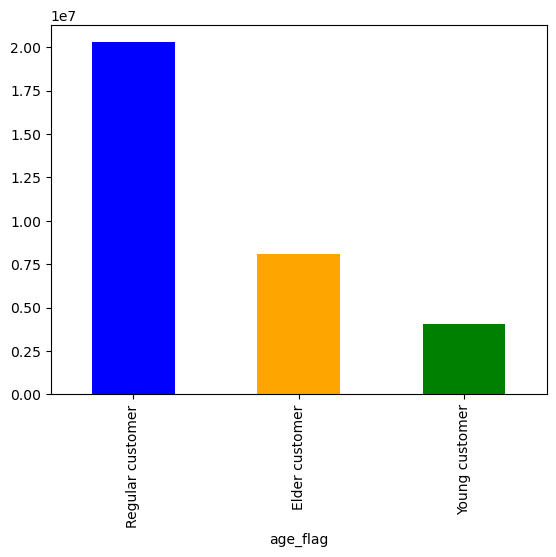

In [37]:
# Create a visualization of distribution of customers by age_flag

bar_age_flag = ords_prods_merge['age_flag'].value_counts().plot.bar(color = ['blue', 'orange', 'green'])

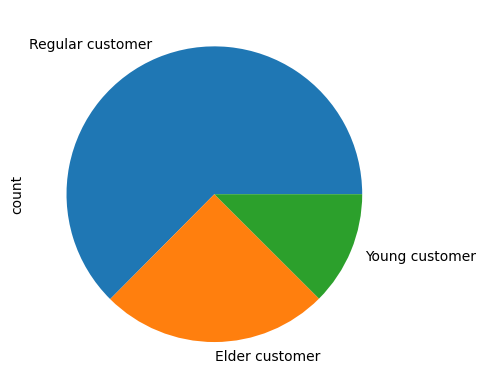

In [38]:
pie_age_flag = ords_prods_merge['age_flag'].value_counts().plot.pie()

I think the pie chart demonstrate the demographics better than the bar chart.

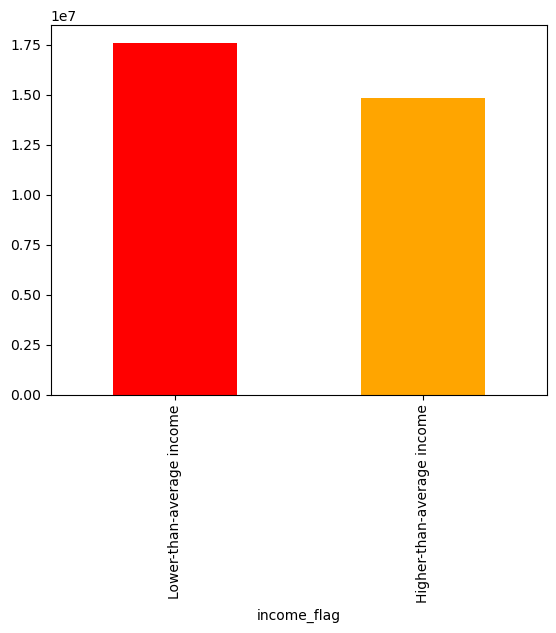

In [40]:
# Create a visualization of distribution of customers by income_flag

bar_income_flag = ords_prods_merge['income_flag'].value_counts().plot.bar(color = ['red', 'orange', 'yellow'])

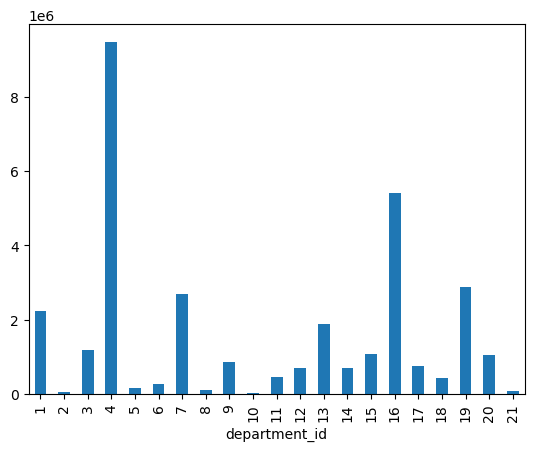

In [41]:
# Create a visualization of distribution of goods by department_id

bar_department_id = ords_prods_merge['department_id'].value_counts().sort_index().plot.bar()

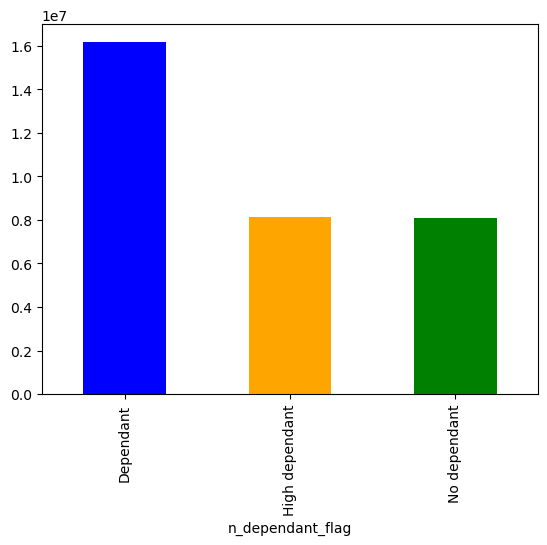

In [42]:
# Create a visualization of distribution of customers by n_dependants

bar_n_dependant_flag = ords_prods_merge['n_dependant_flag'].value_counts().plot.bar(color = ['blue', 'orange', 'green'])

## 7. Aggregate the max, mean, and min on a customer-profile level for usage frequency and expenditure

In [44]:
ords_prods_merge.groupby('age_flag').agg({'prices': ['max', 'mean', 'min'], 'days_since_prior_order': ['max', 'mean', 'min']})

prices                 days_since_prior_order             \
                      max       mean  min                    max       mean   
age_flag                                                                      
Elder customer    99999.0  11.838480  1.0                   30.0  11.075736   
Regular customer  99999.0  11.997890  1.0                   30.0  11.108127   
Young customer    99999.0  12.175118  1.0                   30.0  11.087052   

                       
                  min  
age_flag               
Elder customer    0.0  
Regular customer  0.0  
Young customer    0.0

In [45]:
ords_prods_merge.groupby('income_flag').agg({'prices': ['max', 'mean', 'min'], 'days_since_prior_order': ['max', 'mean', 'min']})

prices                 days_since_prior_order  \
                                max       mean  min                    max   
income_flag                                                                  
Higher-than-average income  99999.0  16.579486  1.0                   30.0   
Lower-than-average income   99999.0   8.106627  1.0                   30.0   

                                            
                                 mean  min  
income_flag                                 
Higher-than-average income  11.037349  0.0  
Lower-than-average income   11.147998  0.0

In [46]:
ords_prods_merge.groupby('department_id').agg({'prices': ['max', 'mean', 'min'], 'days_since_prior_order': ['max', 'mean', 'min']})

prices                 days_since_prior_order                
                   max       mean  min                    max       mean  min
department_id                                                                
1                 15.0   7.736553  1.0                   30.0  11.679090  0.0
2                 15.0   6.990934  1.1                   30.0  10.955939  0.0
3                 15.0   7.853809  1.0                   30.0  11.091347  0.0
4                 15.0   7.981708  1.0                   30.0  10.865077  0.0
5                 15.0   8.143701  1.0                   30.0  10.395410  0.0
6                 15.0   7.682264  1.0                   30.0  11.270742  0.0
7                 15.0   7.680502  1.0                   30.0  11.050062  0.0
8                 15.0   7.889070  1.0                   30.0  11.808537  0.0
9                 15.0   7.350283  1.0                   30.0  11.719954  0.0
10                14.1   8.348960  1.4                   30.0  10.149857  0.0
11                15.0   7.996769  1.0                   30.0  11.551650  0.0
12                25.0  16.294443  8.0                   30.0  11.403156  0.0
13                20.0   8.009443  1.0                   30.0  11.152092  0.0
14                14.9   8.028963  1.0                   30.0  11.276398  0.0
15                15.0   7.539976  1.0                   30.0  11.610766  0.0
16             99999.0  33.479533  1.0                   30.0  10.986912  0.0
17                15.0   7.384058  1.0                   30.0  11.926256  0.0
18                15.0   7.638380  1.0                   30.0  10.057289  0.0
19                 7.0   4.275437  1.6                   30.0  10.951144  0.0
20                15.0   7.778701  1.0                   30.0  11.322606  0.0
21                15.0   8.660716  1.0                   30.0  10.244168  0.0

In [47]:
ords_prods_merge.groupby('n_dependant_flag').agg({'prices': ['max', 'mean', 'min'], 'days_since_prior_order': ['max', 'mean', 'min']})

prices                 days_since_prior_order             \
                      max       mean  min                    max       mean   
n_dependant_flag                                                              
Dependant         99999.0  11.999659  1.0                   30.0  11.105652   
High dependant    99999.0  11.793264  1.0                   30.0  11.102707   
No dependant      99999.0  12.129243  1.0                   30.0  11.075634   

                       
                  min  
n_dependant_flag       
Dependant         0.0  
High dependant    0.0  
No dependant      0.0

## 8. Compare customer profiles with regions and departments

In [49]:
# Compare age with regions

crosstab_2 = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['age_flag'], dropna = False)

In [50]:
crosstab_2

age_flag,Elder customer,Regular customer,Young customer
region,,,
Midwest,1881637,4776154,939534
Northeast,1458952,3552672,711112
South,2669420,6745800,1376665
West,2078092,5196943,1017878


The proportion of each customer age group is quite consistent across all regions. (Elder customers make up roughly 25% of each region. Regular customers consistently form about 62-63% of each region. Young customers account for around 12-13% of each region.)

In [52]:
# Compare income with regions

crosstab_3 = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['income_flag'], dropna = False)

In [53]:
crosstab_3

income_flag,Higher-than-average income,Lower-than-average income
region,,
Midwest,3539942,4057383
Northeast,2628475,3094261
South,4865843,5926042
West,3780506,4512407


The proportion of income groups is quite consistent across all regions. This suggests a relatively balanced distribution of income groups across all regions, with a slight majority of customers having lower-than-average income in each region. So far it indicates that there isn't a strong regional disparity in either customer age or income profiles.

In [55]:
# Compare number of dependent with regions

crosstab_4 = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['n_dependant_flag'], dropna = False)

In [56]:
crosstab_4

n_dependant_flag,Dependant,High dependant,No dependant
region,,,
Midwest,3817458,1874667,1905200
Northeast,2859355,1445080,1418301
South,5383688,2706538,2701659
West,4111746,2108824,2072343


The overall customer base is predominantly regular customers with lower-than-average income and dependents, consistently across all regions. 
This uniformity suggests no significant regional differences in the customer profile distributions based on age, income, or dependents status.

In [58]:
# Compare age with departments

crosstab_5 = pd.crosstab(ords_prods_merge['department_id'], ords_prods_merge['age_flag'], dropna = False)

In [59]:
crosstab_5

age_flag,Elder customer,Regular customer,Young customer
department_id,,,
1,560317,1394451,279975
2,8798,22826,4667
3,291223,734779,146426
4,2368314,5933373,1177604
5,36948,96337,20411
6,66615,168601,34037
7,675269,1679767,333087
8,24877,59544,13295
9,216412,540406,109809


In [60]:
# Compare income with departments

crosstab_6 = pd.crosstab(ords_prods_merge['department_id'], ords_prods_merge['income_flag'], dropna = False)

In [61]:
crosstab_6

income_flag,Higher-than-average income,Lower-than-average income
department_id,,
1,1035872,1198871
2,16556,19735
3,549526,622902
4,4410873,5068418
5,72730,80966
6,125781,143472
7,1173458,1514665
8,47052,50664
9,412023,454604


In [62]:
# Compare number of dependent with departments

crosstab_7 = pd.crosstab(ords_prods_merge['department_id'], ords_prods_merge['n_dependant_flag'], dropna = False)

In [63]:
crosstab_7

n_dependant_flag,Dependant,High dependant,No dependant
department_id,,,
1,1116556,561027,557160
2,18256,8860,9175
3,585164,292859,294405
4,4715980,2387866,2375445
5,74842,39736,39118
6,134692,66848,67713
7,1343618,670063,674442
8,48784,24349,24583
9,431639,219726,215262


Given that department_id 8 is pet goods and department_id 18 is baby products, and the two categories show two specific groups of people, pet owners and parents, we can see from the above three tables that regular-age customers (26-65) are the primary buyers of both pet goods and baby products. Lower-than-average income customers slightly favor both pet goods and baby products.
In addition, customers with dependents (both regular dependents and high dependents) are the main buyers of baby products, while those with dependents also favor pet goods, but not as overwhelmingly).

## 9. Produce suitable charts to illustrate the results and export them

In [66]:
pie_age_flag.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'pie_age_flag'))

bar_income_flag.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_income_flag'))

bar_department_id.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_department_id'))

bar_n_dependant_flag.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_n_dependant_flag'))

## 10. Export the final data set

In [68]:
ords_prods_merge.dtypes

user_id                             int64
first_name                         object
surname                            object
gender                             object
state                              object
age                                 int64
date_joined                        object
n_dependants                        int64
fam_status                         object
income                              int64
product_id                          int64
product_name                       object
aisle_id                            int64
department_id                       int64
prices                            float64
order_id                            int64
eval_set                           object
number_of_order                     int64
orders_day_of_week                  int64
order_hour_of_day                   int64
days_since_prior_order            float64
add_to_cart_order                   int64
reordered                           int64
_merge                           c

In [69]:
ords_prods_merge.shape

(32404859, 41)

In [70]:
ords_prods_merge.head()

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,...,average_prices,spending_flag,median_days_since_prior_order,order_frequency_flag,_merge3,region,exculsion_flag,age_flag,income_flag,n_dependant_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,7.988889,Low spender,19.0,Regular customer,both,Midwest,Regular activity,Regular customer,Higher-than-average income,High dependant
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,7.988889,Low spender,19.0,Regular customer,both,Midwest,Regular activity,Regular customer,Higher-than-average income,High dependant
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,7.988889,Low spender,19.0,Regular customer,both,Midwest,Regular activity,Regular customer,Higher-than-average income,High dependant
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,7.988889,Low spender,19.0,Regular customer,both,Midwest,Regular activity,Regular customer,Higher-than-average income,High dependant
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,7.988889,Low spender,19.0,Regular customer,both,Midwest,Regular activity,Regular customer,Higher-than-average income,High dependant


In [122]:
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_all.pkl'))